In [8]:
import os
from pathlib import Path
import sys

from arcgis.geometry import Geometry

In [4]:
# paths to common data locations - NOTE: to convert any path to a raw string, simply use str(path_instance)
project_parent = Path('./').absolute().parent

data_dir = project_parent/'data'

data_raw = data_dir/'raw'
data_ext = data_dir/'external'
data_int = data_dir/'interim'
data_out = data_dir/'processed'

# import the project package from the project package path
sys.path.append(str(project_parent/'src'))
from vtpk_export import VectorTileLayer, _download_file
import vtpk_export

# load the "autoreload" extension so that code can change, & always reload modules so that as you change code in src, it gets loaded
%load_ext autoreload
%autoreload 2

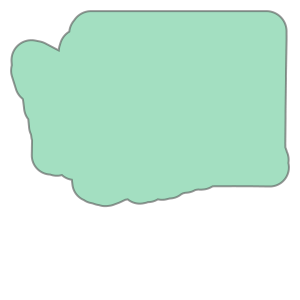

In [10]:
topo_url = 'https://basemaps.arcgis.com/arcgis/rest/services/World_Basemap_v2/VectorTileServer'
cntr_url = 'https://basemaps.arcgis.com/arcgis/rest/services/World_Contours_v2/VectorTileServer'

wa_json = '{"rings":[[[-12954416.574999999,6246506.9290999994],[-12956619.092700001,6114384.3929999992],[-12956571.288899999,6102644.6322000027],[-12956573.2171,6101744.3822000027],[-12956576.958799999,6101396.6045000032],[-12957890.9157,6000663.2919000015],[-12958090.262699999,5984187.0122999996],[-12958116.734999999,5961777.4116000012],[-12958119.0307,5961282.7577000037],[-12958119.729800001,5961202.1827000007],[-12958980.2697,5867189.2424999997],[-12958784.047800001,5852560.1068999991],[-12955950.9451,5844855.8140999973],[-12955675.504900001,5844092.7238999978],[-12955180.5382,5842646.2625999972],[-12954717.2972,5841189.5261999965],[-12954285.9878,5839723.2173999995],[-12953886.800999999,5838248.0438999981],[-12953548.8356,5836881.6453000009],[-12953244.934500001,5836234.2577000037],[-12952626.3565,5834837.9764999971],[-12952038.476199999,5833428.6724999994],[-12951481.5616,5832007.0280999988],[-12950955.864700001,5830573.7317000031],[-12950461.6227,5829129.4764999971],[-12949999.0571,5827674.9602999985],[-12949568.3738,5826210.8850999996],[-12949169.7634,5824737.9570999965],[-12948803.400800001,5823256.8857000023],[-12948469.444899999,5821768.3839000016],[-12948168.0392,5820273.1670999974],[-12947899.3113,5818771.9535999969],[-12947663.373,5817265.4636000022],[-12947460.3202,5815754.4192000031],[-12947290.232999999,5814239.5441000015],[-12947153.1755,5812721.5628999993],[-12947049.1963,5811201.2006999999],[-12946978.3278,5809679.1837000027],[-12946940.5868,5808156.2374000028],[-12946935.973999999,5806633.0873999968],[-12946964.4748,5805110.4585999995],[-12947026.058600001,5803589.0749000013],[-12947120.6789,5802069.6589000002],[-12947248.2739,5800552.9311000034],[-12947408.766100001,5799039.6108999997],[-12947602.0626,5797530.4143999964],[-12947828.0549,5796026.0556000024],[-12947859.2224,5795845.3748999983],[-12947533.269099999,5794392.8241999969],[-12947232.724199999,5792902.1986000016],[-12946964.7555,5791405.5916000009],[-12946729.4746,5789903.7214000002],[-12946526.977400001,5788397.3078000024],[-12946357.343800001,5786887.0719000027],[-12946220.6379,5785373.7364000008],[-12946116.908199999,5783858.0243000016],[-12946046.187100001,5782340.6591999978],[-12946008.4915,5780822.3646000028],[-12946003.8225,5779303.8637999967],[-12946032.165199999,5777785.8796000034],[-12946093.489500001,5776269.1335999966],[-12946187.749200001,5774754.3461000025],[-12946314.8829,5773242.235799998],[-12946474.813200001,5771733.5195000023],[-12946667.447700001,5770228.9113000035],[-12946892.6786,5768729.1231999993],[-12947150.3825,5767234.8637000024],[-12947440.4209,5765746.8383999988],[-12947762.6404,5764265.7485999987],[-12948116.872200001,5762792.2925999984],[-12948502.933,5761327.1634000018],[-12948920.624600001,5759871.0500999987],[-12949369.733899999,5758424.6366999969],[-12949850.033399999,5756988.6018999964],[-12950361.2816,5755563.6190000027],[-12950903.221799999,5754150.3552000001],[-12951475.5842,5752749.4720999971],[-12952078.0844,5751361.6243999973],[-12952710.4243,5749987.4604000002],[-12953372.292300001,5748627.6209999993],[-12954063.3632,5747282.7404000014],[-12954783.2985,5745953.4450000003],[-12955531.7466,5744640.3533999994],[-12956308.343,5743344.0759999976],[-12957112.7104,5742065.2148000002],[-12957944.458799999,5740804.3637999967],[-12958803.185899999,5739562.1072999984],[-12959688.477499999,5738339.0209999979],[-12960599.907099999,5737135.6713000014],[-12961537.036499999,5735952.6147999987],[-12962499.416099999,5734790.3981000036],[-12963486.585099999,5733649.5582000017],[-12964498.0713,5732530.6216000021],[-12965533.391899999,5731434.1044000015],[-12966592.053199999,5730360.511500001],[-12967673.5513,5729310.3378000036],[-12968777.372200001,5728284.0659999996],[-12969902.991999999,5727282.1686000004],[-12971049.876899999,5726305.1054000035],[-12972217.483899999,5725353.3254999965],[-12973405.2607,5724427.2656000033],[-12974612.646400001,5723527.3502999991],[-12975839.070900001,5722653.9922999963],[-12977083.9564,5721807.5916000009],[-12978346.7162,5720988.5355999991],[-12979626.7566,5720197.1991999969],[-12980923.4757,5719433.9442000017],[-12982236.2643,5718699.1194999963],[-12983564.5067,5717993.0606999993],[-12984907.579700001,5717316.0904999971],[-12986264.8543,5716668.5178000033],[-12987635.694699999,5716050.6379000023],[-12989019.4597,5715462.7327999994],[-12990415.5022,5714905.0702999979],[-12991823.1698,5714377.9046000019],[-12993241.8049,5713881.4755999967],[-12994670.745299999,5713416.009800002],[-12996109.3244,5712981.7189000025],[-12997556.871300001,5712578.8003000021],[-12999012.710999999,5712207.4376000017],[-13000476.1654,5711867.7995999977],[-13001946.5525,5711560.0407000035],[-13003423.187800001,5711284.3011000007],[-13004905.3839,5711040.7057000026],[-13006392.4508,5710829.3655000031],[-13007883.696800001,5710650.3762999997],[-13009378.4279,5710503.8197000027],[-13010875.949099999,5710389.7621000037],[-13012375.563999999,5710308.2555000037],[-13013876.574999999,5710259.3364999965],[-13015378.284299999,5710243.0278000012],[-13016439.3563,5710251.1695000008],[-13078524.0529,5710985.6979999989],[-13091639.656300001,5711052.7296999991],[-13133506.5897,5710991.6872000024],[-13133771.5734,5710991.1794999987],[-13135273.408,5711007.4896000028],[-13136774.544300001,5711056.4122999981],[-13138274.284400001,5711137.9258000031],[-13139778.725299999,5711252.6589000002],[-13223376.105,5710941.9496999979],[-13229972.9454,5707411.0116999969],[-13231081.4024,5706829.4953000024],[-13232200.0701,5706268.1843999997],[-13233328.5844,5705727.2564999983],[-13234466.578600001,5705206.8834000006],[-13235613.682700001,5704707.2295999974],[-13236769.524700001,5704228.4531999975],[-13237933.729,5703770.7058999985],[-13239105.918200001,5703334.1323999986],[-13240522.8037,5702838.3020000011],[-13241949.9824,5702373.3969999999],[-13243386.7883,5701939.6294],[-13244832.5514,5701537.1961999983],[-13246286.5978,5701166.2806999981],[-13247748.249600001,5700827.0517000034],[-13249216.826200001,5700519.6635000035],[-13250691.6436,5700244.2555999979],[-13252403.7678,5699965.8470000029],[-13254122.252,5699730.5288000032],[-13258374.748300001,5699201.4878000021],[-13259438.092,5699077.3024000004],[-13260503.2074,5698969.6165999994],[-13261569.8421,5698878.4557999969],[-13262637.7435,5698803.8408999965],[-13263706.658399999,5698745.7893000022],[-13264776.333799999,5698704.314199999],[-13265846.5162,5698679.4253000021],[-13266916.952199999,5698671.1283000037],[-13267942.6472,5698678.746100001],[-13268968.119199999,5698701.5979000032],[-13269993.145100001,5698739.6790999994],[-13271017.501899999,5698792.9811000004],[-13272040.9671,5698861.4930000007],[-13273063.317699999,5698945.2001999989],[-13274084.331500001,5699044.0846000016],[-13275103.7864,5699158.1256000027],[-13275812.216600001,5699242.141900003],[-13277319.953400001,5698958.0820999965],[-13278923.158199999,5698696.074500002],[-13280532.0012,5698471.8558999971],[-13282145.6043,5698285.5455000028],[-13283249.671500001,5698184.316399999],[-13284605.506099999,5697787.3324000016],[-13286461.500300001,5697270.9149999991],[-13287925.8202,5696907.1513999999],[-13288175.8641,5696759.9703999981],[-13289485.323100001,5696026.9649000019],[-13290810.1982,5695322.6535999998],[-13292149.8683,5694647.358099997],[-13293503.705400001,5694001.3871999979],[-13294871.0757,5693385.0349999964],[-13296251.339200001,5692798.5832000002],[-13297643.850499999,5692242.2987999991],[-13299047.958900001,5691716.4355000034],[-13300463.008299999,5691221.2330000028],[-13301888.338100001,5690756.9166999981],[-13303323.283399999,5690323.6978999972],[-13304767.174800001,5689921.7741999999],[-13306219.3391,5689551.3281999975],[-13307679.0997,5689212.5283000022],[-13309145.7764,5688905.5289999992],[-13310618.6862,5688630.4694999978],[-13311889.2881,5688419.6476999968],[-13313163.552200001,5688232.5912000015],[-13314441.0404,5688069.3630999997],[-13315721.313299999,5687930.0179999992],[-13324537.716499999,5687044.9838000014],[-13325175.8857,5686860.5187999979],[-13326153.6384,5686593.3945999965],[-13327135.1579,5686340.6771000028],[-13328120.234999999,5686102.4191000015],[-13331656.076299999,5685276.2719999999],[-13332964.6405,5684550.9539000019],[-13334287.8178,5683847.5239000022],[-13335625.7718,5683173.0731000006],[-13336977.875500001,5682527.9096999988],[-13337792.350499999,5682160.7631999999],[-13338480.8529,5681599.4676999971],[-13339662.8083,5680677.8298999965],[-13340864.2805,5679782.2105000019],[-13342084.702500001,5678913.0197999999],[-13343323.499,5678070.6560999975],[-13344580.086300001,5677255.505400002],[-13345853.873399999,5676467.940700002],[-13347144.2612,5675708.322300002],[-13348450.6438,5674976.9975999966],[-13349772.4078,5674274.300999999],[-13351108.933400001,5673600.5533000007],[-13352459.5945,5672956.0621000007],[-13353823.758299999,5672341.1216999963],[-13355200.786499999,5671756.0126999989],[-13356590.035,5671201.0018000007],[-13357990.854699999,5670676.3420000002],[-13359402.591,5670182.2726000026],[-13360824.5847,5669719.0183999985],[-13362256.1724,5669286.7907000035],[-13363696.686099999,5668885.7858999968],[-13365145.454399999,5668516.1868000031],[-13366601.801899999,5668178.1616000012],[-13368065.0502,5667871.8637999967],[-13369534.5176,5667597.4328999966],[-13371481.008000001,5667284.4177000001],[-13373435.5507,5667027.3012999967],[-13375396.5634,5666826.2867000028],[-13377362.459100001,5666681.5332999974],[-13379661.7874,5666544.2150000036],[-13391400.782499999,5663694.0714000016],[-13392496.2182,5663436.4048999995],[-13393595.6653,5663196.7016000003],[-13394698.833700001,5662975.0231000036],[-13395805.4319,5662771.4268999994],[-13397279.6439,5662529.1147999987],[-13398758.7017,5662318.8878000006],[-13400241.917100001,5662140.8413999975],[-13401728.5998,5661995.0566999987],[-13403218.0581,5661881.5996999964],[-13404709.599399999,5661800.5222999975],[-13406202.5297,5661751.8610000014],[-13407696.1546,5661735.6381999999],[-13409077.657,5661749.5165000036],[-13410458.6098,5661791.1463999972],[-13411838.463300001,5661860.5116999969],[-13413216.6687,5661957.5852999985],[-13414592.6775,5662082.329400003],[-13415965.942,5662234.6955000013],[-13417335.9154,5662414.6246000007],[-13418702.0527,5662622.0465999991],[-13423452.942299999,5663390.5753000006],[-13423884.974300001,5663123.4539000019],[-13425173.442200001,5662364.9384000003],[-13426477.882100001,5661634.6752000004],[-13427797.681699999,5660932.9980000034],[-13429132.221900001,5660260.2274999991],[-13430480.877500001,5659616.6708000004],[-13431843.0166,5659002.6218999997],[-13433218.001899999,5658418.3606999964],[-13434605.190299999,5657864.1539999992],[-13436003.9333,5657340.2542999983],[-13437413.577500001,5656846.9003000036],[-13438833.4647,5656384.3169],[-13440262.932300001,5655952.7146999985],[-13441701.313299999,5655552.2903999984],[-13443147.937199999,5655183.2260999978],[-13444602.1296,5654845.6899000034],[-13446063.2129,5654539.8351999968],[-13447530.5067,5654265.8013999984],[-13449003.3276,5654023.7128999978],[-13450480.99,5653813.6797000021],[-13451962.806299999,5653635.7976000011],[-13453448.0867,5653490.1472999975],[-13454936.1404,5653376.7950000018],[-13456426.274900001,5653295.7924000025],[-13457917.7974,5653247.1761000007],[-13459176.2172,5653233.5075000003],[-13460201.682700001,5652849.4177000001],[-13461507.4747,5652391.2436999977],[-13462822.106899999,5651959.4878000021],[-13464145.0518,5651554.3187000006],[-13465475.779100001,5651175.8950999975],[-13466813.7554,5650824.3650999963],[-13468158.444800001,5650499.8663000017],[-13469509.308699999,5650202.5253000036],[-13470865.806200001,5649932.4584999979],[-13476293.160399999,5648906.9011999965],[-13477190.919199999,5648743.1467000023],[-13478662.838300001,5648501.2031000033],[-13480139.596099999,5648291.2958000004],[-13481620.5053,5648113.5201999992],[-13483104.876699999,5647967.9571999982],[-13484592.0196,5647854.6727000028],[-13486081.2423,5647773.7185000032],[-13487571.852,5647725.131099999],[-13489063.155200001,5647708.9328999966],[-13490554.4586,5647725.131099999],[-13492045.068300001,5647773.7185000032],[-13493534.291000001,5647854.6727000028],[-13495021.433899999,5647967.9571999982],[-13496505.805300001,5648113.5201999992],[-13497986.714499999,5648291.2958000004],[-13499463.4723,5648501.2031000033],[-13500935.3914,5648743.1467000023],[-13502401.786699999,5649017.0165999979],[-13503861.975099999,5649322.688000001],[-13505315.2766,5649660.0219999999],[-13506761.014,5650028.865199998],[-13508198.5133,5650429.0496999994],[-13509627.104499999,5650860.3932000026],[-13511046.1208,5651322.6992999986],[-13512454.9002,5651815.7573999986],[-13513852.7848,5652339.3430999964],[-13515239.1215,5652893.2173999995],[-13516613.2623,5653477.1278999969],[-13517974.5645,5654090.8084999993],[-13519322.390900001,5654733.9787999988],[-13520656.110399999,5655406.3453999981],[-13521975.097899999,5656107.6010000035],[-13523278.7347,5656837.4255999997],[-13524566.409,5657595.4852000028],[-13525837.515999999,5658381.4333000034],[-13527091.457800001,5659194.9101999998],[-13528327.6445,5660035.5433999971],[-13529545.493799999,5660902.9478999972],[-13530744.431699999,5661796.7261999995],[-13531923.892000001,5662716.4685000032],[-13532797.659400001,5663428.8449999988],[-13532915.587099999,5663400.7146999985],[-13534074.9026,5663145.2273999974],[-13535238.395199999,5662909.7937999964],[-13536405.723000001,5662694.4814999998],[-13537879.9223,5662452.1714999974],[-13539358.967500001,5662241.9463],[-13540842.170299999,5662063.9012999982],[-13541081.2311,5662040.4587000012],[-13541215.6282,5661969.0085999966],[-13542550.3224,5661296.1621999964],[-13543899.1335,5660652.5331000015],[-13545261.4296,5660038.4149999991],[-13546636.5734,5659454.0882000029],[-13547782.2664,5658996.3620000035],[-13547963.9768,5658894.4532999992],[-13549188.0416,5658240.0285999998],[-13550424.897599999,5657610.498999998],[-13551674.044399999,5657006.112499997],[-13560755.8485,5652718.7740999982],[-13562150.8665,5652078.2917999998],[-13563559.6581,5651469.183600001],[-13564981.5264,5650891.7436999977],[-13566415.769000001,5650346.2501000017],[-13584435.3847,5643701.3012000024],[-13584872.198800001,5643541.3975000009],[-13586279.684799999,5643048.7817000002],[-13587697.3989,5642586.8901999965],[-13589124.679400001,5642155.933600001],[-13590560.860199999,5641756.1079000011],[-13592005.2719,5641387.5953999981],[-13593457.2411,5641050.563699998],[-13594916.0911,5640745.1661000028],[-13596381.1426,5640471.5417999998],[-13598161.6304,5640183.0469999984],[-13599948.988499999,5639941.4692000002],[-13606382.446,5639155.5363000035],[-13607421.009100001,5639036.3065000027],[-13608461.2445,5638932.9197999984],[-13609502.914099999,5638845.3995999992],[-13610545.779199999,5638773.7655000016],[-13611589.6011,5638718.0336000025],[-13612634.140799999,5638678.2158999965],[-13613679.159,5638654.3219999969],[-13614724.4165,5638646.3567000031],[-13616214.2236,5638662.5389000028],[-13617703.3379,5638711.0785999969],[-13619191.066300001,5638791.9534000009],[-13620676.7171,5638905.1265999973],[-13622159.598999999,5639050.5468999967],[-13623639.022,5639228.1480000019],[-13625114.297600001,5639437.8492999971],[-13626584.7391,5639679.5552999973],[-13628049.662,5639953.1564000025],[-13629508.384,5640258.5276999995],[-13630960.2258,5640595.5304000005],[-13632404.510600001,5640964.0112999976],[-13633840.565499999,5641363.802699998],[-13635267.7205,5641794.7224000022],[-13636685.309999999,5642256.5741999969],[-13637416.872200001,5642512.6158000007],[-13638559.645199999,5642649.802199997],[-13640035.4801,5642859.5812000036],[-13641506.4792,5643101.3769000024],[-13642750.850499999,5643331.6706999987],[-13643990.826200001,5643584.8801999986],[-13645225.9902,5643860.9224999994],[-13646455.9278,5644159.7067999989],[-13647680.2259,5644481.1354999989],[-13648898.473299999,5644825.1030000001],[-13650110.260600001,5645191.496299997],[-13651315.180399999,5645580.1953999996],[-13661493.7729,5648958.3709999993],[-13666811.1611,5650014.4187000021],[-13668089.2139,5650280.1679999977],[-13669362.059,5650570.1714000031],[-13670629.2423,5650884.3281000033],[-13671890.311700001,5651222.5282000005],[-13673144.817200001,5651584.6542000026],[-13674392.310899999,5651970.5798000023],[-13675632.3473,5652380.1705000028],[-13676864.4833,5652813.2833999991],[-13678262.5228,5653336.9257000014],[-13679649.0133,5653890.8601000011],[-13681023.306499999,5654474.8338999972],[-13682384.7597,5655088.5807999969],[-13683732.7357,5655731.8207999989],[-13685066.603399999,5656404.260300003],[-13686385.737399999,5657105.5921000019],[-13687689.519099999,5657835.4958000034],[-13688647.736499999,5658396.0055000037],[-13689596.8957,5658971.9567999989],[-13690536.750599999,5659563.2041999996],[-13691467.057500001,5660169.5983999968],[-13692387.5747,5660790.9862999991],[-13692597.4881,5660937.6640999988],[-13693605.1746,5661376.0323999971],[-13694673.8619,5661862.7832000032],[-13695734.195,5662367.7431000024],[-13696785.866999999,5662890.7697999999],[-13697828.573800001,5663431.7159999982],[-13698862.013599999,5663990.4289000034],[-13699885.8871,5664566.751000002],[-13701174.671399999,5665325.4482999966],[-13702446.874699999,5666112.0578000024],[-13703701.898800001,5666926.2193000019],[-13704939.153099999,5667767.5605999976],[-13706158.0549,5668635.6957999989],[-13707358.0295,5669530.2273000032],[-13708538.510600001,5670450.7449000031],[-13709698.940400001,5671396.8262000009],[-13710838.7699,5672368.0367000028],[-13711957.4596,5673363.9305000007],[-13713054.4791,5674384.0495000035],[-13714129.307500001,5675427.9244000018],[-13715181.433899999,5676495.0747999996],[-13716210.3575,5677585.0090999976],[-13717215.5877,5678697.2246999964],[-13718196.6449,5679831.2085999995],[-13719153.059799999,5680986.4372000024],[-13720084.374299999,5682162.3769999966],[-13720990.1417,5683358.4839000031],[-13721869.9265,5684574.2044999972],[-13722723.305100001,5685808.9759000018],[-13723549.865800001,5687062.2256999984],[-13724349.208799999,5688333.3725999966],[-13725120.946899999,5689621.8263999969],[-13725864.7052,5690926.9883999974],[-13726580.121399999,5692248.2515999973],[-13727266.8462,5693585.0007999986],[-13727924.543400001,5694936.6137000024],[-13728552.8901,5696302.4596000016],[-13729151.576400001,5697681.9012999982],[-13729720.306699999,5699074.2942000031],[-13730258.7985,5700478.9873000011],[-13730766.783300001,5701895.3231000006],[-13731244.0068,5703322.6384000033],[-13731690.229,5704760.2637000009],[-13732105.2238,5706207.5243000016],[-13732488.780000001,5707663.7400999963],[-13732840.7008,5709128.2265999988],[-13733160.8039,5710600.2942999974],[-13733448.9222,5712079.2496000007],[-13733649.7587,5713227.5795999989],[-13733831.3002,5714379.2895999998],[-13733993.4877,5715534.0534999967],[-13734136.2677,5716691.5450000018],[-13735567.458000001,5729145.5988000035],[-13735754.7403,5730990.6629000008],[-13735843.0196,5732173.876000002],[-13736079.0776,5733156.0490000024],[-13736400.0998,5734632.0349000022],[-13736435.9189,5734815.8442000002],[-13736873.475400001,5734879.5346999988],[-13738205.269400001,5735099.9394999966],[-13739685.841400001,5735376.3980000019],[-13741160.1492,5735684.9593999982],[-13742627.5067,5736025.4830000028],[-13744087.2302,5736397.814199999],[-13745538.639699999,5736801.7836999968],[-13746981.058600001,5737237.2079000026],[-13748413.814199999,5737703.8884000033],[-13749836.238299999,5738201.6128999963],[-13751247.6668,5738730.1550000012],[-13752647.4406,5739289.2738000005],[-13754034.9056,5739878.7145000026],[-13755409.412999999,5740498.2088000029],[-13756770.319699999,5741147.4739999995],[-13758116.9888,5741826.2140000015],[-13759448.789000001,5742534.118900001],[-13760765.096099999,5743270.8659000024],[-13762065.292399999,5744036.1181000024],[-13763348.767200001,5744829.5258999988],[-13764614.917199999,5745650.7267000005],[-13765863.1468,5746499.3445999995],[-13767092.868099999,5747374.9914000034],[-13768303.501499999,5748277.2659000009],[-13769494.4757,5749205.7545000017],[-13770665.2281,5750160.0314999968],[-13771650.414099999,5750996.6187999994],[-13772557.2073,5751796.074000001],[-13773001.428300001,5751672.4411000013],[-13774463.653099999,5751299.4861000031],[-13775933.5242,5750958.3919999972],[-13777410.3572,5750649.314000003],[-13778893.464600001,5750372.3924999982],[-13780382.1558,5750127.7531000003],[-13781875.738499999,5749915.5073999986],[-13783373.5175,5749735.7512999997],[-13784874.7963,5749588.5667999983],[-13786378.876899999,5749474.0207000002],[-13787885.059799999,5749392.1647000015],[-13789392.6447,5749343.0363000035],[-13790900.9308,5749326.6577000022],[-13792409.2169,5749343.0363000035],[-13793916.8018,5749392.1647000015],[-13795422.9846,5749474.0207000002],[-13796927.065299999,5749588.5667999983],[-13798428.3441,5749735.7512999997],[-13799926.123100001,5749915.5073999986],[-13801419.705699999,5750127.7531000003],[-13802908.397,5750372.3924999982],[-13804391.5043,5750649.314000003],[-13805868.337400001,5750958.3919999972],[-13807338.2086,5751299.4861000031],[-13808800.4333,5751672.4411000013],[-13810254.330400001,5752077.0876000002],[-13811699.2224,5752513.2414000034],[-13813134.4352,5752980.7043000013],[-13814559.2994,5753479.2631999999],[-13815052.637600001,5753663.9943000004],[-13815440.3836,5753676.629900001],[-13816947.289900001,5753758.5241999999],[-13818452.092900001,5753873.1243000031],[-13819954.092900001,5754020.3778999969],[-13821452.591600001,5754200.2184000015],[-13822946.891800001,5754412.564000003],[-13824436.2985,5754657.3181999996],[-13825920.118799999,5754934.3699000031],[-13827397.661800001,5755243.5934000015],[-13828868.239700001,5755584.8476999998],[-13830331.1678,5755957.9782000035],[-13831785.7644,5756362.8149999976],[-13833231.351500001,5756799.1740000024],[-13834667.2553,5757266.8566000015],[-13836092.805599999,5757765.6503999978],[-13837507.337400001,5758295.3278999999],[-13838910.1899,5758855.6482999995],[-13840300.707800001,5759446.3562000021],[-13841678.240800001,5760067.1823000014],[-13843042.1447,5760717.8438000008],[-13844391.7808,5761398.0439999998],[-13845726.516800001,5762107.4724999964],[-13847045.727,5762845.8055000007],[-13848348.7925,5763612.7056000009],[-13849635.1011,5764407.8227000013],[-13850904.0485,5765230.7932000011],[-13852155.0374,5766081.2405000031],[-13853387.4791,5766958.7757000029],[-13854600.792300001,5767862.9966000021],[-13855794.4047,5768793.4892000034],[-13856967.752500001,5769749.8268999979],[-13858120.2806,5770731.5706999972],[-13859251.443300001,5771738.2700999975],[-13860360.704500001,5772769.4627000019],[-13861447.537700001,5773824.6744000018],[-13862511.425900001,5774903.4196999967],[-13863551.8632,5776005.202200003],[-13864568.3533,5777129.5143000036],[-13865560.411,5778275.8374999985],[-13866527.561900001,5779443.6432000026],[-13867469.342599999,5780632.391900003],[-13868385.3014,5781841.5346999988],[-13869274.9978,5783070.5119000003],[-13870138.0033,5784318.7550999969],[-13870973.9013,5785585.6859000027],[-13871782.287700001,5786870.7168999985],[-13872562.770399999,5788173.2519000024],[-13873314.9702,5789492.6860999987],[-13874038.5206,5790828.4057999998],[-13874733.0682,5792179.7899999991],[-13875398.272599999,5793546.2092000023],[-13876033.8071,5794927.0265000015],[-13876639.358100001,5796321.5976999998],[-13877214.6262,5797729.2717000023],[-13877759.3254,5799149.3905000016],[-13878273.184,5800581.2898000032],[-13878755.944600001,5802024.2990000024],[-13879207.3638,5803477.7415999994],[-13879627.2129,5804940.935800001],[-13880015.2776,5806413.1943000033],[-13880371.3587,5807893.825000003],[-13880695.271499999,5809382.131099999],[-13880986.8464,5810877.4113000035],[-13881245.929,5812378.9609000012],[-13881472.379700001,5813886.0709000006],[-13881666.0748,5815398.0292999968],[-13881826.905400001,5816914.1208999977],[-13881954.7783,5818433.6279999986],[-13882049.615699999,5819955.8303000033],[-13882111.355700001,5821480.0055999979],[-13882139.9517,5823005.4301000014],[-13882131.7655,5824763.6705000028],[-13881208.5962,5878351.6039000005],[-13881525.594599999,5879455.8112000003],[-13881917.128699999,5880940.4079999998],[-13882276.4114,5882433.4553999975],[-13882603.256099999,5883934.2506000027],[-13882897.4914,5885442.0868000016],[-13883194.289000001,5887177.1939999983],[-13883447.8759,5888919.5339000002],[-13884287.2029,5895231.9067000002],[-13885664.081500001,5901070.9296000004],[-13886040.450100001,5901888.2653999999],[-13886653.617600001,5903299.6169999987],[-13887236.139699999,5904724.2396000028],[-13887787.7268,5906161.4673999995],[-13888308.1032,5907610.6283999979],[-13888797.008099999,5909071.0443999991],[-13889254.194699999,5910542.0309000015],[-13889679.4308,5912022.8979000002],[-13890072.499499999,5913512.9503000006],[-13890433.1983,5915011.4875999987],[-13890761.3399,5916517.804899998],[-13891056.7521,5918031.1926999986],[-13891317.2972,5919538.6843999997],[-13891545.344799999,5921051.7312000021],[-13891740.7719,5922569.6300000027],[-13891903.4702,5924091.6743000001],[-13894900.0309,5955215.1613999978],[-13895084.4811,5955445.7789999992],[-13895926.8006,5956541.7594999969],[-13896747.875599999,5957654.060999997],[-13897547.3905,5958782.2734000012],[-13898325.0374,5959925.9796999991],[-13899080.5163,5961084.757600002],[-13899813.5353,5962258.1785999984],[-13900523.8103,5963445.8083999977],[-13901291.4837,5964791.3931000009],[-13902029.944800001,5966153.6019999981],[-13902738.8325,5967531.8018999994],[-13903417.7992,5968925.3514999971],[-13904066.5107,5970333.6017000005],[-13904684.6469,5971755.8963000029],[-13905271.9014,5973191.5715999976],[-13905827.982000001,5974639.9567999989],[-13906352.6109,5976100.3748999983],[-13906845.5244,5977572.1427000016],[-13907306.4739,5979054.5702999979],[-13907735.225099999,5980546.9628000036],[-13908131.559,5982048.6194999963],[-13908495.2711,5983558.8350000009],[-13908826.172499999,5985076.8986999989],[-13909124.089200001,5986602.0958999991],[-13909315.5243,5987689.0711999983],[-13909490.1951,5988779.0226000026],[-13909648.0535,5989871.6904999986],[-13909789.055500001,5990966.8144000024],[-13913178.0724,6018941.1350999996],[-13914382.9454,6026649.6763999984],[-13915732.102499999,6029664.4694000036],[-13917040.4286,6030722.8435000032],[-13918228.0034,6031733.6494999975],[-13919393.591400001,6032770.1630999967],[-13920536.640000001,6033831.9091000035],[-13921656.607000001,6034918.4004999995],[-13922752.959899999,6036029.1385999992],[-13923825.1768,6037163.6128999963],[-13924872.7466,6038321.3017999977],[-13925895.169199999,6039501.6728999987],[-13926891.9553,6040704.182099998],[-13927862.627500001,6041928.2756000012],[-13928806.719599999,6043173.3884999976],[-13929723.777800001,6044438.9460999966],[-13930613.3598,6045724.3636000007],[-13931475.0361,6047029.0464000031],[-13932308.389600001,6048352.3906000033],[-13933113.0155,6049693.7831000015],[-13933888.5229,6051052.6019999981],[-13934634.533,6052428.2160999998],[-13935350.6811,6053819.9866999984],[-13936036.615899999,6055227.2665000036],[-13936691.999499999,6056649.4003000036],[-13937316.508200001,6058085.7252999991],[-13937909.8324,6059535.5719000027],[-13938471.6765,6060998.2628000006],[-13939107.9541,6062781.2084999979],[-13939697.425099999,6064580.679899998],[-13954063.1032,6110321.7261999995],[-13954389.948100001,6111387.7952999994],[-13954700.43,6112458.9171999991],[-13954994.469900001,6113534.8400999978],[-13955271.991599999,6114615.3117000014],[-13955532.9234,6115700.0776000023],[-13955777.1972,6116788.8827000037],[-13956004.7488,6117881.4704999998],[-13956215.517999999,6118977.5834999979],[-13956484.729499999,6120532.6015999988],[-13956720.1456,6122093.4140999988],[-13956921.6362,6123659.2840000018],[-13957089.087299999,6125229.4711000025],[-13957222.4005,6126803.2318999991],[-13957321.493900001,6128379.8210999966],[-13957386.3014,6129958.4909000024],[-13957416.773499999,6131538.4913000017],[-13957412.876699999,6133119.071800001],[-13957374.593699999,6134699.4796999991],[-13957301.923999999,6136278.9624999985],[-13957194.883000001,6137856.7666999996],[-13957053.502999999,6139432.1388999969],[-13956877.8324,6141004.3260999992],[-13956667.9362,6142572.5763000026],[-13956423.896,6144136.1379000023],[-13956127.5109,6145790.3492000028],[-13955792.879900001,6147437.5340000018],[-13954957.5297,6151313.326700002],[-13955859.2216,6165600.681400001],[-13955957.942400001,6167593.6431000009],[-13956002.1494,6169589.0326000005],[-13955998.3421,6171176.6031000018],[-13955959.9958,6172764.0053000003],[-13955887.1095,6174350.4826999977],[-13955779.6984,6175935.2787000015],[-13955637.7948,6177517.6367999986],[-13955461.4472,6179096.8003000021],[-13955250.720800001,6180672.0138999969],[-13955005.697000001,6182242.5227999985],[-13954726.474100001,6183807.5737999976],[-13954413.1668,6185366.4155000001],[-13954065.906500001,6186918.2987999991],[-13953684.840700001,6188462.4768999964],[-13953270.1336,6189998.2060000002],[-13952821.9659,6191524.7457000017],[-13952340.534499999,6193041.3588000014],[-13951826.0526,6194547.3126000017],[-13951278.749600001,6196041.878899999],[-13950698.870999999,6197524.3334999979],[-13950086.6787,6198993.9579999968],[-13949442.449999999,6200450.0392000005],[-13948766.478599999,6201891.8698000014],[-13948059.0735,6203318.7488999963],[-13947320.559599999,6204729.9814999998],[-13946551.2772,6206124.8805999979],[-13945751.582,6207502.7653999999],[-13944921.844599999,6208862.9636999965],[-13944062.451200001,6210204.8105000034],[-13943173.8024,6211527.6498000026],[-13942256.3136,6212830.8334000036],[-13941310.414900001,6214113.7233999968],[-13940336.5507,6215375.6903000027],[-13939335.179299999,6216616.1146000028],[-13938306.7732,6217834.3867999986],[-13937251.818300001,6219029.9077000022],[-13936170.814399999,6220202.0891999975],[-13935064.2743,6221350.3536000028],[-13933932.7237,6222474.1350999996],[-13932776.701299999,6223572.8791000023],[-13931596.758200001,6224646.0430999994],[-13930393.457899999,6225693.0969000012],[-13929167.375500001,6226713.5223999992],[-13927919.098200001,6227706.8149999976],[-13926649.2245,6228672.4826000035],[-13925358.3638,6229610.0468999967],[-13924047.136599999,6230519.0424999967],[-13922716.173700001,6231399.0190000013],[-13921366.1165,6232249.5388000011],[-13919997.615699999,6233070.1796000004],[-13918611.3321,6233860.5336999968],[-13917207.9351,6234620.2078000009],[-13915788.103799999,6235348.8236000016],[-13914352.5252,6236046.0187000036],[-13912901.8946,6236711.4455000013],[-13911436.9154,6237344.7723999992],[-13909958.2983,6237945.683600001],[-13908466.761,6238513.8791999966],[-13906963.0283,6239049.0759000033],[-13905447.831,6239551.0064999983],[-13903921.905999999,6240019.4199000001],[-13902385.996199999,6240454.0825000033],[-13900840.8489,6240854.7769000009],[-13899287.2171,6241221.3027999997],[-13897725.857799999,6241553.4769999981],[-13896157.532200001,6241851.1331999972],[-13894583.004900001,6242114.1225999966],[-13893003.0441,6242342.3134000003],[-13891418.420699999,6242535.5917999968],[-13889829.9079,6242693.8606999964],[-13888238.281399999,6242817.0410000011],[-13886644.318,6242905.0710000023],[-13885048.796,6242957.9067000002],[-13883452.4944,6242975.5213999972],[-13881856.193,6242957.9067000002],[-13880260.671,6242905.0710000023],[-13878666.707600001,6242817.0410000011],[-13877075.081,6242693.8606999964],[-13875486.568300001,6242535.5917999968],[-13873901.944899999,6242342.3134000003],[-13872321.984099999,6242114.1225999966],[-13870747.456799999,6241851.1331999972],[-13869307.165100001,6241579.1230000034],[-13852067.294300001,6238123.8906000033],[-13850703.2718,6237835.368900001],[-13849345.0791,6237520.6172000021],[-13847993.2212,6237179.7555999979],[-13846648.201099999,6236812.9142000005],[-13845310.5188,6236420.2330000028],[-13843980.6712,6236001.8618000001],[-13842659.1523,6235557.9601000026],[-13841346.453,6235088.697300002],[-13840273.5243,6234683.7736999989],[-13839207.1632,6234261.9125000015],[-13838147.6371,6233823.2220999971],[-13837095.2117,6233367.8158000037],[-13836050.150899999,6232895.8109000027],[-13835012.716499999,6232407.3289000019],[-13833983.168099999,6231902.4954999983],[-13832961.763500001,6231381.4408999979],[-13783896.5077,6205613.5878999978],[-13783801.4098,6207017.8431999981],[-13783659.076299999,6208605.9453999996],[-13783482.1724,6210190.8452999964],[-13783270.763599999,6211771.7845999971],[-13783024.931499999,6213348.0059999973],[-13782821.401999999,6214508.2573999986],[-13782599.2075,6215665.2214000002],[-13782358.398499999,6216818.5952000022],[-13782099.030099999,6217968.0760999992],[-13781821.162599999,6219113.3627000004],[-13781524.861,6220254.1545000002],[-13781210.1953,6221390.1516000032],[-13780877.2403,6222521.0552999973],[-13777742.5298,6232853.5073999986],[-13777242.386500001,6234436.2582999989],[-13776706.4376,6236007.5002999976],[-13776156.5689,6237509.3519999981],[-13775573.963399999,6238999.0376999974],[-13774958.883400001,6240475.8352999985],[-13774311.608199999,6241939.0276999995],[-13773632.4322,6243387.9042000026],[-13772921.666099999,6244821.7602000013],[-13772179.6359,6246239.8977999985],[-13771406.683600001,6247641.6256000027],[-13770603.1665,6249026.2599000037],[-13769769.4571,6250393.1247999966],[-13768905.9429,6251741.5520000011],[-13768013.026700001,6253070.8818000033],[-13767091.125700001,6254380.4636000022],[-13766140.672,6255669.6551999971],[-13765162.1121,6256937.8241999969],[-13764155.9066,6258184.3480999991],[-13763122.529899999,6259408.6138999984],[-13762062.470699999,6260610.0196999982],[-13760976.230799999,6261787.9738000035],[-13759864.3255,6262941.8959999979],[-13758727.283199999,6264071.2171000019],[-13757565.645100001,6265175.379900001],[-13756379.9651,6266253.8388999999],[-13755170.8093,6267306.060999997],[-13753938.7557,6268331.5258999988],[-13752684.394400001,6269329.7258000001],[-13751408.3269,6270300.1662999988],[-13750111.1656,6271242.3660999984],[-13748793.5339,6272155.858099997],[-13747456.066100001,6273040.188699998],[-13746099.406300001,6273894.9186000004],[-13745535.994899999,6274232.7861000001],[-13745361.116599999,6275801.1297999993],[-13745148.254700001,6277394.2741999999],[-13744900.701099999,6278982.6723000035],[-13744618.554499999,6280565.5622000024],[-13744301.930500001,6282142.183799997],[-13743950.961300001,6283711.7792999968],[-13743565.7958,6285273.5930999964],[-13743146.5997,6286826.8729000017],[-13742693.555,6288370.8694000021],[-13742206.8605,6289904.8372000009],[-13741686.7313,6291428.0346999988],[-13741133.3992,6292939.7248999998],[-13740547.1121,6294439.1755999997],[-13739928.134199999,6295925.6595999971],[-13739276.745999999,6297398.4550999999],[-13738593.243700001,6298856.8466999978],[-13737877.9399,6300300.1247999966],[-13737131.162599999,6301727.5864000022],[-13736353.2557,6303138.5362000018],[-13735544.5788,6304532.2851999998],[-13734705.506299999,6305908.1529000029],[-13733836.4286,6307265.4666000009],[-13732937.750700001,6308603.5622000024],[-13732009.8925,6309921.7841000035],[-13731053.288800001,6311219.4858999997],[-13730068.388799999,6312496.0307999998],[-13729055.656100001,6313750.7920000032],[-13728015.568300001,6314983.1521999985],[-13727685.928100001,6315356.7695999965],[-13727518.216400001,6315618.7223000005],[-13726618.665899999,6316958.1454999968],[-13725689.9056,6318277.675999999],[-13724732.3706,6319576.6666999981],[-13723746.510499999,6320854.4802000001],[-13722732.7894,6322110.4888999984],[-13721691.6852,6323344.0750999972],[-13720623.690000001,6324554.6318000033],[-13719529.309599999,6325741.5627999976],[-13718409.063000001,6326904.2828999981],[-13717263.4826,6328042.2185999975],[-13716093.113499999,6329154.8077000007],[-13714898.514,6330241.5007999986],[-13713680.2543,6331301.7603999972],[-13712438.916999999,6332335.0615999997],[-13711175.0964,6333340.8928000033],[-13709889.398699999,6334318.7551999986],[-13708582.441,6335268.1639999971],[-13707254.8517,6336188.6480000019],[-13705907.2696,6337079.7498999983],[-13704540.3442,6337941.0270000026],[-13703154.7345,6338772.0507000014],[-13701751.1099,6339572.4078999981],[-13700330.148499999,6340341.6996000037],[-13698892.537700001,6341079.5430999994],[-13697438.9737,6341785.5703999996],[-13695970.160799999,6342459.429399997],[-13694486.8113,6343100.7840000018],[-13692989.645300001,6343709.3139000013],[-13691479.389800001,6344284.7153000012],[-13689956.778999999,6344826.7009000033],[-13688422.553100001,6345334.9993999973],[-13686877.458799999,6345809.3571999967],[-13685322.248399999,6346249.5367000028],[-13683757.679400001,6346655.3178000003],[-13682184.5144,6347026.497299999],[-13680603.520199999,6347362.889700003],[-13679015.4681,6347664.3259999976],[-13677536.739500001,6347912.5583000034],[-13676053.225499999,6348130.4750000015],[-13674565.5492,6348317.9829000011],[-13673074.3356,6348475.0006999969],[-13671580.2117,6348601.4609000012],[-13670083.805100001,6348697.308799997],[-13668585.744899999,6348762.503200002],[-13667086.6609,6348797.0159000009],[-13454732.7075,6348811.1196999997],[-13452820.1513,6348811.2342000008],[-13229925.060699999,6348825.4055000022],[-13228630.5535,6348825.4549999982],[-13158376.477,6348829.9978],[-13157691.191399999,6348830.0129999965],[-13073404.9004,6348831.8593000025],[-13072832.6489,6348831.8787999973],[-13027753.3148,6348834.4032000005],[-13026161.314399999,6348812.8625999987],[-13024570.1609,6348756.7223000005],[-13022980.6085,6348666.0091999993],[-13021393.410500001,6348540.7675999999],[-13019809.3189,6348381.0584999993],[-13018229.0844,6348186.9594999999],[-13016653.455499999,6347958.5647],[-13015083.178399999,6347695.9856000021],[-13013495.120299999,6347394.5478999987],[-13011914.120299999,6347058.1542999968],[-13010340.949200001,6346686.9733999968],[-13008776.374400001,6346281.1908000037],[-13007221.158199999,6345841.0095999986],[-13005676.0581,6345366.6499999985],[-13004141.8265,6344858.3493999988],[-13002619.209899999,6344316.3619000018],[-13001108.9487,6343740.9582000002],[-12999611.777100001,6343132.425999999],[-12998128.4221,6342491.0689999983],[-12996659.603700001,6341817.2074000016],[-12995206.0342,6341111.1775999963],[-12993768.418099999,6340373.3313999996],[-12992347.451400001,6339604.0366000012],[-12990943.8214,6338803.6763999984],[-12989558.206700001,6337972.6495999992],[-12988191.2761,6337111.3691999987],[-12986843.688999999,6336220.2639999986],[-12985516.094799999,6335299.7765000015],[-12984209.132199999,6334350.3641000018],[-12982923.4296,6333372.4979000017],[-12981659.6044,6332366.6630000025],[-12980418.262400001,6331333.3579000011],[-12979199.998300001,6330273.0943000019],[-12978005.394200001,6329186.3971000016],[-12976835.0209,6328073.8038000017],[-12975689.4363,6326935.8637999967],[-12974569.1855,6325773.1393000036],[-12973474.800999999,6324586.2039000019],[-12972406.801899999,6323375.6427000016],[-12971365.6939,6322142.0517999977],[-12970351.969000001,6320886.0385000035],[-12969366.1053,6319608.2201000005],[-12968408.5667,6318309.2246000022],[-12967479.803100001,6316989.689199999],[-12966580.249400001,6315650.2609999999],[-12965710.326000001,6314291.5961999968],[-12964870.4385,6312914.3598000035],[-12964060.9771,6311519.2250000015],[-12963282.317200001,6310106.873499997],[-12962534.818300001,6308677.9943000004],[-12961818.8247,6307233.2839000002],[-12961134.664900001,6305773.4456999972],[-12960482.6515,6304299.1903000027],[-12959863.0812,6302811.2338000014],[-12959276.2345,6301310.2986999974],[-12958722.3761,6299797.1127000004],[-12958201.753899999,6298272.4091000035],[-12957714.5998,6296736.9255999997],[-12957261.1294,6295191.4042000026],[-12956841.541299999,6293636.5917000026],[-12956456.017999999,6292073.2374000028],[-12956104.725099999,6290502.0949999988],[-12955787.8115,6288923.9205000028],[-12955505.4098,6287339.4724999964],[-12955273.5348,6285858.8153000027],[-12955071.776799999,6284373.9922000021],[-12954900.2037,6282885.6203999966],[-12954758.870200001,6281394.318400003],[-12954647.8192,6279900.7043000013],[-12954567.080400001,6278405.3971000016],[-12954516.6713,6276909.0156000033],[-12954496.5965,6275412.1787],[-12954406.515999999,6247990.3057999983],[-12954408.851199999,6247113.4246999994],[-12954416.574999999,6246506.9290999994]]],"spatialReference":{"wkid":102100,"latestWkid":3857}}'
input_object = Geometry(wa_json)
input_object

In [11]:
topo_vtpk = VectorTileLayer(topo_url)

topo_vtpk

<VectorTileLayer url:"https://basemaps.arcgis.com/arcgis/rest/services/World_Basemap_v2/VectorTileServer">

In [12]:
lod_max = 5
lod = list(range(0,lod_max+1))

In [14]:
topo_tiles = topo_vtpk.export_tiles(extent=input_object, output_dir=data_int)

UnboundLocalError: local variable 'vtpk_lst' referenced before assignment